In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# load the mnist dataset from the kears library
(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)
# data scaling
Xtrain = Xtrain/ Xtrain.max()
Xtest = Xtest/ Xtest.max()
print(len(np.unique(ytrain)))

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
10


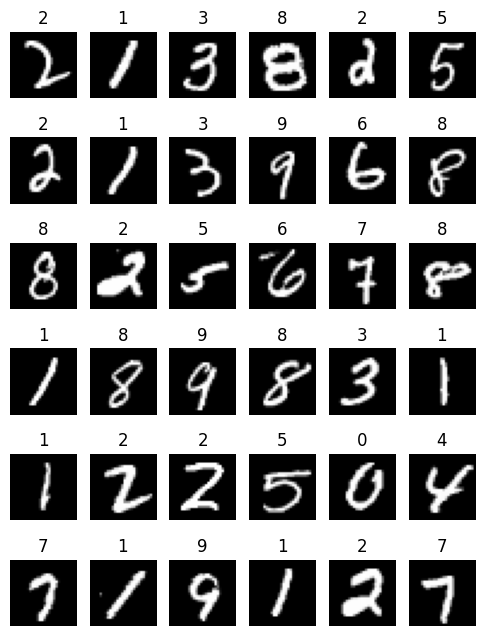

In [ ]:
import numpy as np
plt.figure(1,(6,8))
for i in range(1,36+1,1):
  temp = np.random.randint(0,60000)
  im = Xtrain[temp,:,:]
  lab = ytrain[temp]
  plt.subplot(6,6,i)
  plt.imshow(im,cmap='gray')
  plt.axis('off')
  plt.title(lab)

In [ ]:
# create the neural network
nn_model = keras.Sequential() # create an empty nn feed forward
# framework
nn_model.add(keras.layers.Flatten
 (input_shape=(Xtrain.shape[1],Xtrain.shape[2]))) # input layer

nn_model.add(keras.layers.Dense(128,activation='relu')) # Hidden layer 1
nn_model.add(keras.layers.Dense(256,activation='relu')) # Hidden layer 2
nn_model.add(keras.layers.Dense(256,activation='relu')) # Hidden layer 3

nn_model.add(keras.layers.Dense(len(np.unique(ytrain)))) # output layer



# optimizer add
nn_model.compile(optimizer="SGD",
                 loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

print(nn_model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 10)                2570      
                                                                 
Total params: 201866 (788.54 KB)
Trainable params: 201866 (788.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# train the model for Xtrain and ytrain
history = nn_model.fit(Xtrain,ytrain,epochs=20)


Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6591 - accuracy: 0.8227
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2788 - accuracy: 0.9181
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2235 - accuracy: 0.9353
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1859 - accuracy: 0.9462
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1594 - accuracy: 0.9537
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1392 - accuracy: 0.9596
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1234 - accuracy: 0.9643
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1100 - accuracy: 0.9675
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0996 - accuracy: 0.9707
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.089

Text(0, 0.5, 'Accuracy')

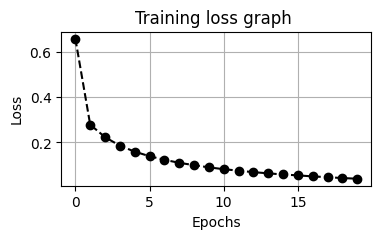

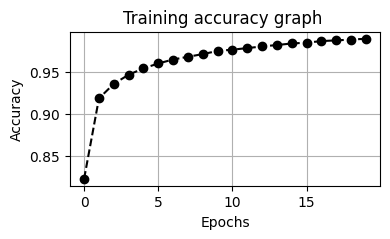

In [ ]:
# visualize the training loss and acc
plt.figure(1,(4,2))

plt.plot(history.epoch,history.history['loss'],'--ko')
plt.grid('on')
plt.title('Training loss graph ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.figure(2,(4,2))
plt.plot(history.epoch,history.history['accuracy'],'--ko')
plt.grid('on')
plt.title('Training accuracy graph ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
# evaluate the test data
[loss, acc] = nn_model.evaluate(Xtest,ytest)
print('Loss:', loss)
print("Testing Accuracy:",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9750
Loss: 0.08151743561029434
Testing Accuracy: 0.9750000238418579
